# Convert .txt to .csv 

In [19]:
import pandas as pd
import re

def convert_log_to_csv(input_file_path, output_file_path):
    # Read the log file line by line
    with open(input_file_path, 'r') as file:
        lines = file.readlines()

    # Define the column names as requested
    columns = [
        'IP_Address', 'Timestamp', 'Method', 'Resource', 'Protocol', 
        'Status Code', 'Bytes Sent', 'Referrer', 'User Agent', 
        'Source Port', 'Destination Port', 'Origin Server', 
        'Destination', 'Response Code', 'Response Time (seconds)', 
        'Backend Time (seconds)'
    ]

    # Initialize an empty list to store the parsed data
    data = []

    # Define the regex pattern for parsing
    regex_pattern = (
        r'(?P<ip_address>\S+) - \[(?P<timestamp>.*?)\] '
        r'"(?P<method>\S+) (?P<resource>\S+) (?P<protocol>[^"]+)" '
        r'(?P<status_code>\d+) (?P<bytes_sent>\d+) '
        r'"(?P<referrer>[^"]*)" "(?P<user_agent>[^"]*)" '
        r'(?P<source_port>\d+) (?P<destination_port>\d+) - '
        r'"(?P<origin_server>[^"]*)" "(?P<destination>[^"]*)" '
        r'"(?P<response_code>\d+)" "(?P<response_time>[\d.]+)" (?P<backend_time>[\d.]+)'
    )

    # Process each line in the log file
    for line in lines:
        try:
            match = re.match(regex_pattern, line)
            if match:
                # Extract the matched groups
                row = [
                    match.group('ip_address'),             # IP
                    match.group('timestamp'),              # Address (Timestamp)
                    match.group('method'),                 # Method
                    match.group('resource'),               # Resource
                    match.group('protocol'),               # Protocol
                    match.group('status_code'),            # Status Code
                    match.group('bytes_sent'),             # Bytes Sent
                    match.group('referrer'),               # Referrer
                    match.group('user_agent'),             # User Agent
                    match.group('source_port'),            # Source Port
                    match.group('destination_port'),       # Destination Port
                    match.group('origin_server'),          # Origin Server
                    match.group('destination'),            # Destination
                    match.group('response_code'),          # Response Code
                    match.group('response_time'),          # Response Time (seconds)
                    match.group('backend_time')            # Backend Time (seconds)
                ]
                
                # Ensure the row has exactly 17 elements
                if len(row) == 16:
                    data.append(row)
                else:
                    pass
                    # print(f"Skipping line due to unexpected number of fields: {line.strip()}")
            else:
                pass
                # print(f"Skipping line due to unmatched format: {line.strip()}")
        except Exception as e:
            # Handle any parsing errors
            print(f"Error parsing line: {line.strip()}\nError: {e}")
            continue
    
    # Check if there is any data to write
    if data:
        # Create a DataFrame and save it as CSV
        df = pd.DataFrame(data, columns=columns)
        df.to_csv(output_file_path, index=False)
    else:
        print("No valid log entries were found to convert to CSV.")

# Usage
convert_log_to_csv('nginx/log/access.log', 'access_logs.csv')


In [20]:
import pandas as pd

# Load the dataset to analyze its structure
data = pd.read_csv('access_logs.csv')

# Display the first few rows of the dataset to understand its content
data.head(10)

,IP_Address,Timestamp,Method,Resource,Protocol,Status Code,Bytes Sent,Referrer,User Agent,Source Port,Destination Port,Origin Server,Destination,Response Code,Response Time (seconds),Backend Time (seconds)
0,127.0.0.1,29/Oct/2024:05:17:54 +0000,GET,/,HTTP/1.1,401,58,-,curl/7.88.1,80,34420,localhost,172.18.0.6:8000,401,0.014,0.014
1,172.18.0.1,29/Oct/2024:05:18:23 +0000,POST,/register/,HTTP/1.1,400,58,-,python-requests/2.32.3,80,58820,localhost,172.18.0.8:8000,400,0.080,0.080
2,127.0.0.1,29/Oct/2024:05:18:24 +0000,GET,/,HTTP/1.1,401,58,-,curl/7.88.1,80,58834,localhost,172.18.0.6:8000,401,0.012,0.012
3,172.18.0.1,29/Oct/2024:05:18:24 +0000,POST,/register/,HTTP/1.1,400,58,-,python-requests/2.32.3,80,58828,localhost,172.18.0.7:8000,400,0.083,0.084
4,172.18.0.1,29/Oct/2024:05:18:26 +0000,POST,/register/,HTTP/1.1,400,58,-,python-requests/2.32.3,80,58842,localhost,172.18.0.8:8000,400,0.061,0.061
5,172.18.0.1,29/Oct/2024:05:18:36 +0000,GET,/admin/userManager/customuser/,HTTP/1.1,200,31657,http://localhost/admin/userManager/customuser/,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,80,38484,localhost,172.18.0.7:8000,200,0.127,0.128
6,172.18.0.1,29/Oct/2024:05:18:36 +0000,GET,/admin/jsi18n/,HTTP/1.1,200,3342,http://localhost/admin/userManager/customuser/,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,80,38484,localhost,172.18.0.6:8000,200,0.072,0.071
7,172.18.0.1,29/Oct/2024:05:18:41 +0000,POST,/admin/userManager/customuser/,HTTP/1.1,200,22199,http://localhost/admin/userManager/customuser/,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,80,38484,localhost,172.18.0.8:8000,200,0.212,0.212
8,172.18.0.1,29/Oct/2024:05:18:43 +0000,POST,/admin/userManager/customuser/,HTTP/1.1,302,0,http://localhost/admin/userManager/customuser/,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,80,38484,localhost,172.18.0.7:8000,302,0.244,0.245
9,172.18.0.1,29/Oct/2024:05:18:43 +0000,GET,/admin/userManager/customuser/,HTTP/1.1,200,26420,http://localhost/admin/userManager/customuser/,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,80,38484,localhost,172.18.0.6:8000,200,0.084,0.085


In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np

# Load the dataset to analyze its structure
data = pd.read_csv('access_logs.csv')

# Ensure the 'Timestamp' column is correctly parsed
if 'Timestamp' in data.columns:
    # Convert 'Timestamp' to datetime using the specified format
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d/%b/%Y:%H:%M:%S %z', errors='coerce')
    data['Hour'] = data['Timestamp'].dt.hour
    data['Day'] = data['Timestamp'].dt.day
    data['Weekday'] = data['Timestamp'].dt.weekday

# Ensure the 'Method' column is in the original string format, not encoded
if 'Method' in data.columns and not data['Method'].dtype == 'object':
    print("Warning: 'Method' column appears to be encoded. Please ensure it's in original string format.")

# Define the categorical columns for one-hot encoding
categorical_columns = ['Method', 'IP_Address', 'Resource', 'User Agent']

# Convert `Method` and other categorical columns using OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_data = data[categorical_columns].astype(str)  # Convert all to strings to avoid type issues

# Fit and transform the data
one_hot_encoded = one_hot_encoder.fit_transform(categorical_data)

# Create DataFrame from the one-hot encoded data
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_columns))

# Ensure the index aligns when concatenating back
one_hot_encoded_df.index = data.index

# Concatenate the one-hot encoded columns back to the original dataset
data = pd.concat([data.drop(columns=categorical_columns), one_hot_encoded_df], axis=1)

# Update the list of numerical columns based on the updated dataset
numerical_columns = [
    'Bytes Sent', 'Source Port', 'Destination Port',
    'Response Time (seconds)', 'Backend Time (seconds)',
    'Hour', 'Day', 'Weekday'
]

# Ensure the columns exist before processing
existing_numerical_columns = [col for col in numerical_columns if col in data.columns]

# Fill any missing or invalid numerical data with the median of the respective columns
data[existing_numerical_columns] = data[existing_numerical_columns].apply(pd.to_numeric, errors='coerce')
data[existing_numerical_columns] = data[existing_numerical_columns].fillna(data[existing_numerical_columns].median())

# Normalize numerical features using StandardScaler
scaler = StandardScaler()
data[existing_numerical_columns] = scaler.fit_transform(data[existing_numerical_columns])

# Display a summary of the processed dataset
print("Processed dataset with One-Hot Encoding and Standardization:")
print(data.head())  # Print the first few rows of the processed dataset to check the output
print("\nColumn Summary:")
print(data.columns)


Processed dataset with One-Hot Encoding and Standardization:
                  Timestamp  Protocol  Status Code  Bytes Sent Referrer  \
0 2024-10-29 05:17:54+00:00  HTTP/1.1          401   -0.105006        -   
1 2024-10-29 05:18:23+00:00  HTTP/1.1          400   -0.105006        -   
2 2024-10-29 05:18:24+00:00  HTTP/1.1          401   -0.105006        -   
3 2024-10-29 05:18:24+00:00  HTTP/1.1          400   -0.105006        -   
4 2024-10-29 05:18:26+00:00  HTTP/1.1          400   -0.105006        -   

   Source Port  Destination Port Origin Server      Destination  \
0          0.0         -1.521596     localhost  172.18.0.6:8000   
1          0.0          1.580370     localhost  172.18.0.8:8000   
2          0.0          1.582150     localhost  172.18.0.6:8000   
3          0.0          1.581387     localhost  172.18.0.7:8000   
4          0.0          1.583167     localhost  172.18.0.8:8000   

   Response Code  ...  Resource_/  Resource_/admin/jsi18n/  \
0            401  ...  

In [22]:
from sklearn.ensemble import IsolationForest
import pandas as pd

# Define the features for training the anomaly detection model
selected_features = existing_numerical_columns

# Check if there are missing features, and print a warning if so
missing_features = set(numerical_columns) - set(existing_numerical_columns)
if missing_features:
    print(f"Warning: The following features are missing and will not be used: {missing_features}")

# Prepare the dataset for training using only existing features
X = data[selected_features]

# Display the selected features to verify correctness
print("Selected features for training:")
print(X.head())

# Initialize and train the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(X)

# Predict anomalies (-1 indicates anomaly, 1 indicates normal)
data['Anomaly'] = iso_forest.predict(X)

# Display the results
anomaly_counts = data['Anomaly'].value_counts()
num_anomalies = anomaly_counts.get(-1, 0)
num_normal = anomaly_counts.get(1, 0)

print(f"Number of detected anomalies: {num_anomalies}")
print(f"Number of normal entries: {num_normal}")

# Optional: Inspect a few anomalies to understand the pattern
print("\nSample Detected Anomalies:")
print(data[data['Anomaly'] == -1].head())

Selected features for training:
   Bytes Sent  Source Port  Destination Port  Response Time (seconds)  \
0   -0.105006          0.0         -1.521596                -0.357389   
1   -0.105006          0.0          1.580370                -0.278502   
2   -0.105006          0.0          1.582150                -0.359779   
3   -0.105006          0.0          1.581387                -0.274916   
4   -0.105006          0.0          1.583167                -0.301212   

   Backend Time (seconds)      Hour  Day  Weekday  
0               -0.357420 -0.338864  0.0      0.0  
1               -0.278525 -0.338864  0.0      0.0  
2               -0.359810 -0.338864  0.0      0.0  
3               -0.273744 -0.338864  0.0      0.0  
4               -0.301237 -0.338864  0.0      0.0  
Number of detected anomalies: 58
Number of normal entries: 1103

Sample Detected Anomalies:
                   Timestamp  Protocol  Status Code  Bytes Sent  \
5  2024-10-29 05:18:36+00:00  HTTP/1.1          200    4.1

In [23]:
# Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Fit the model to the data
iso_forest.fit(X)

# Predict anomalies (-1 indicates anomaly, 1 indicates normal)
data['Anomaly'] = iso_forest.predict(X)

# Display the number of detected anomalies
print("Number of detected anomalies:")
print(data['Anomaly'].value_counts())


Number of detected anomalies:
Anomaly
 1    1103
-1      58
Name: count, dtype: int64


      Method_GET  Method_POST  Method_PATCH  Method_DELETE
0            1.0          0.0           0.0            0.0
1            0.0          1.0           0.0            0.0
2            1.0          0.0           0.0            0.0
3            0.0          1.0           0.0            0.0
4            0.0          1.0           0.0            0.0
...          ...          ...           ...            ...
1156         1.0          0.0           0.0            0.0
1157         1.0          0.0           0.0            0.0
1158         1.0          0.0           0.0            0.0
1159         1.0          0.0           0.0            0.0
1160         1.0          0.0           0.0            0.0

[1161 rows x 4 columns]


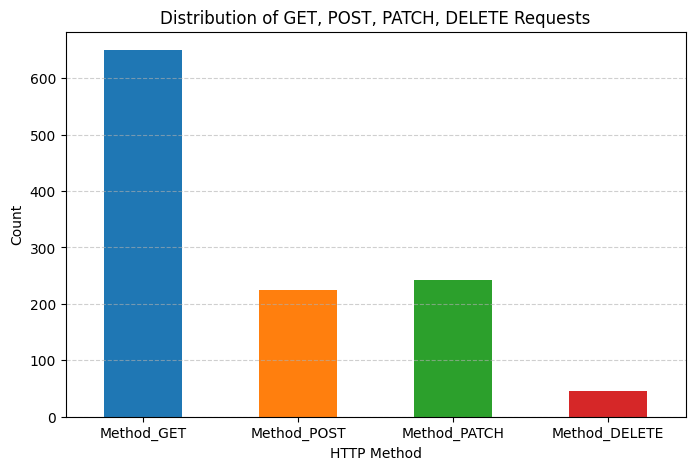

HTTP Method Summary:
          Method  Count  Percentage
0     Method_GET    650   55.986219
1    Method_POST    224   19.293712
2   Method_PATCH    242   20.844100
3  Method_DELETE     45    3.875969


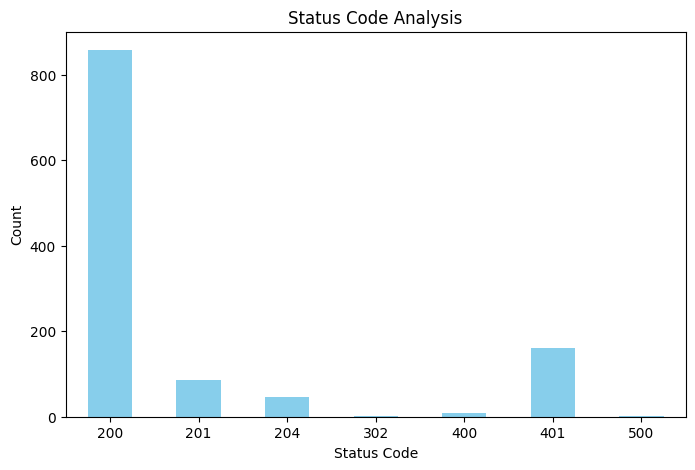

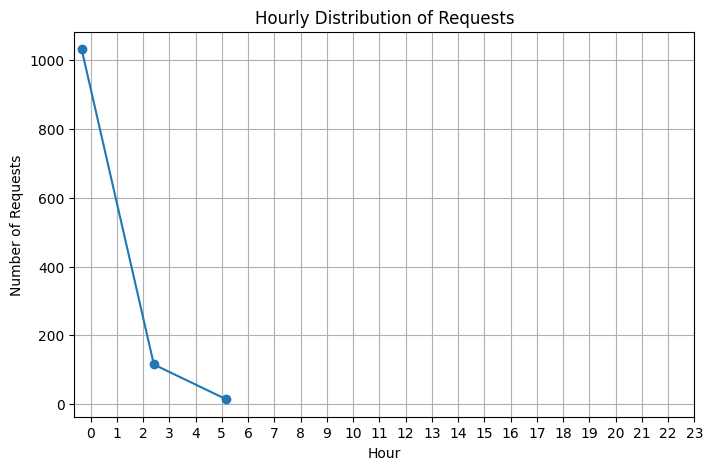

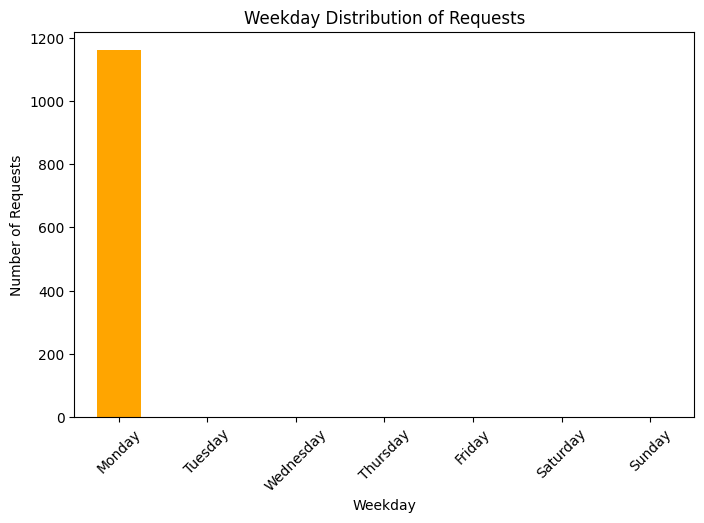

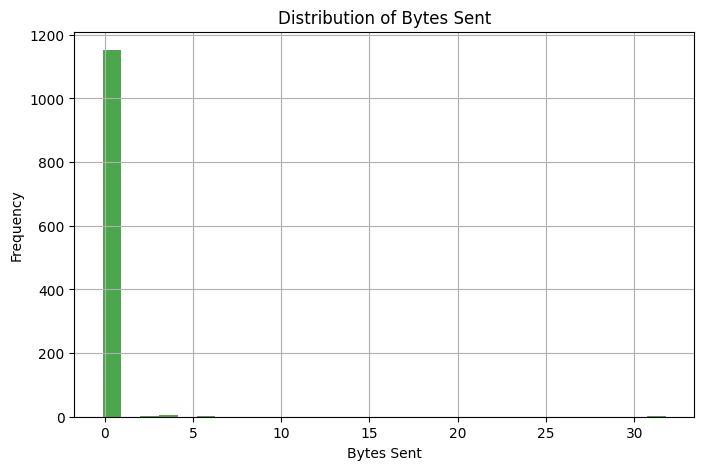

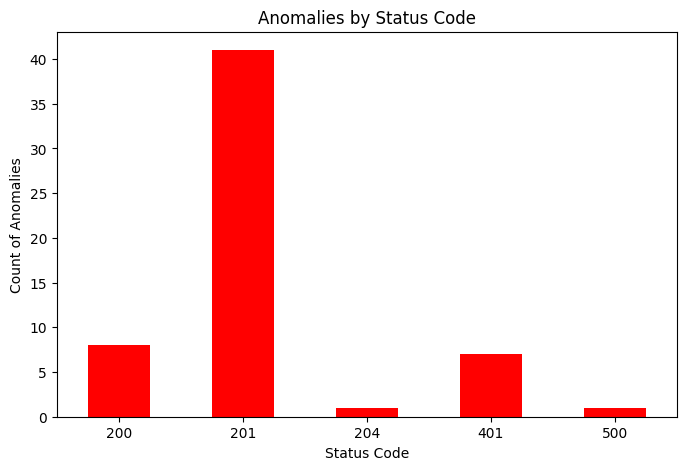

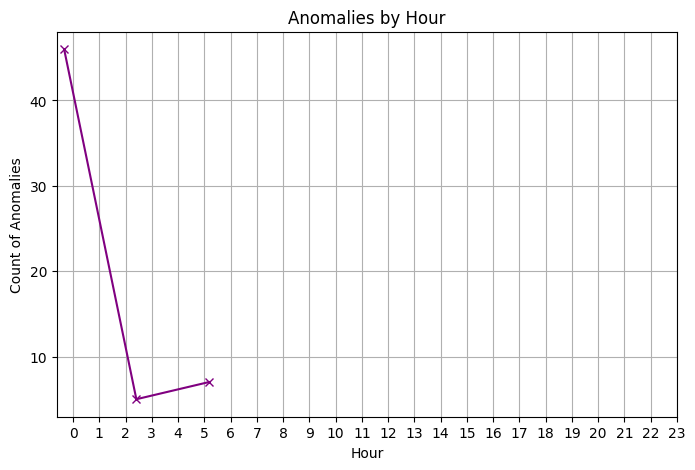

In [24]:
import matplotlib.pyplot as plt

# Display all rows and columns related to HTTP methods (GET, POST, PATCH, DELETE)
http_methods_data = data[['Method_GET', 'Method_POST', 'Method_PATCH', 'Method_DELETE']]
print(http_methods_data)

# 1. Bar Chart: Distribution of GET, POST, PATCH, DELETE Requests
method_counts = data[['Method_GET', 'Method_POST', 'Method_PATCH', 'Method_DELETE']].astype(int).sum()
# Create a bar chart for the distribution of HTTP methods
plt.figure(figsize=(8, 5))
method_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Distribution of GET, POST, PATCH, DELETE Requests')
plt.xlabel('HTTP Method')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
# 2. Summary Table: Counts and Percentages of Each Method
method_summary = method_counts.reset_index()
method_summary.columns = ['Method', 'Count']
method_summary['Percentage'] = (method_summary['Count'] / method_summary['Count'].sum()) * 100
# Display summary table
print("HTTP Method Summary:")
print(method_summary)

# 3. Status Code Analysis
status_code_counts = data['Status Code'].value_counts().sort_index()
status_code_counts.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title('Status Code Analysis')
plt.xlabel('Status Code')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# 4. Time-Based Analysis (Hour and Weekday)
# Hourly Distribution
hour_counts = data['Hour'].value_counts().sort_index()
hour_counts.plot(kind='line', figsize=(8, 5), marker='o')
plt.title('Hourly Distribution of Requests')
plt.xlabel('Hour')
plt.ylabel('Number of Requests')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# Weekday Distribution
# Ensure all weekdays are represented, even if some are missing
weekday_counts = data['Weekday'].value_counts().reindex(range(7), fill_value=0).sort_index()
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts.index = weekday_labels
weekday_counts.plot(kind='bar', figsize=(8, 5), color='orange')
plt.title('Weekday Distribution of Requests')
plt.xlabel('Weekday')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.show()

# 5. Distribution of Bytes Sent
plt.figure(figsize=(8, 5))
plt.hist(data['Bytes Sent'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of Bytes Sent')
plt.xlabel('Bytes Sent')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 6. Anomaly Analysis across Different Features
# We'll look at anomalies over Status Code and Hour as examples
anomalies = data[data['Anomaly'] == -1]

# Anomalies by Status Code
anomaly_status_code = anomalies['Status Code'].value_counts().sort_index()
anomaly_status_code.plot(kind='bar', figsize=(8, 5), color='red')
plt.title('Anomalies by Status Code')
plt.xlabel('Status Code')
plt.ylabel('Count of Anomalies')
plt.xticks(rotation=0)
plt.show()

# Anomalies by Hour
anomaly_hour = anomalies['Hour'].value_counts().sort_index()
anomaly_hour.plot(kind='line', figsize=(8, 5), marker='x', color='purple')
plt.title('Anomalies by Hour')
plt.xlabel('Hour')
plt.ylabel('Count of Anomalies')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


# 








Investigation

In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

# Calculate the decision scores (anomaly score, the lower, the more anomalous)
data['Anomaly_Score'] = iso_forest.decision_function(X)

# Filter out anomalies and normal points for comparison
anomalies = data[data['Anomaly'] == -1]
normals = data[data['Anomaly'] == 1]

# Display the top 5 anomalies with their scores
print("Top 5 Anomalous Data Points:")
print(anomalies[['Anomaly_Score'] + data.columns[:-2].tolist()].sort_values(by='Anomaly_Score').head(5))

# Compare statistical differences between normal and anomalous data
print("\nStatistical Summary of Normal Data:")
print(normals.describe())

print("\nStatistical Summary of Anomalous Data:")
print(anomalies.describe())



Top 5 Anomalous Data Points:
      Anomaly_Score  IP_Address  Method  Resource  Protocol  Status Code  \
107       -0.194178           0       3         5  HTTP/1.1          500   
111       -0.189027           0       3         5  HTTP/1.1          500   
1051      -0.182901           0       1         1  HTTP/1.1          200   
1052      -0.180417           0       1         1  HTTP/1.1          200   
418       -0.125343           0       3         5  HTTP/1.1          201   

      Bytes Sent  User Agent  Source Port  Destination Port      Destination  \
107     1.705528           2          0.0          0.002485  172.18.0.6:8000   
111     1.704144           2          0.0          0.023661  172.18.0.6:8000   
1051   -0.204160           0          0.0          0.691914  172.18.0.6:8000   
1052   -0.204160           0          0.0          0.824505  172.18.0.7:8000   
418    -0.540563           2          0.0         -1.307790  172.18.0.6:8000   

      Response Code  Response Tim

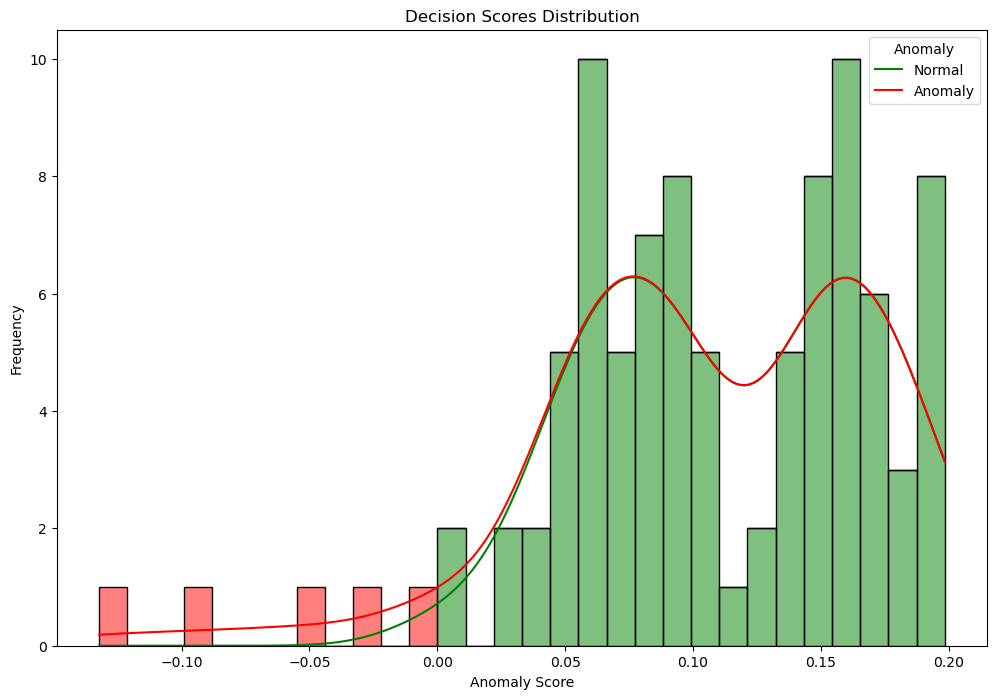

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new DataFrame for visualization purposes
plot_data = data[['Anomaly_Score', 'Anomaly']].copy()

# Plot the decision scores with a histogram, separating anomalies and normal points
plt.figure(figsize=(12, 8))
sns.histplot(data=plot_data, x='Anomaly_Score', hue='Anomaly', kde=True, bins=30, 
             palette={1: 'green', -1: 'red'}, multiple='stack')
plt.title('Decision Scores Distribution')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.legend(title='Anomaly', labels=['Normal', 'Anomaly'])
plt.show()

# Script to detect anomaly score

In [18]:
import re
import pandas as pd
import time
from datetime import datetime
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, StandardScaler
import subprocess
import json
import joblib
from pathlib import Path
from sklearn.exceptions import NotFittedError

# Paths for model and scaler
MODEL_PATH = "iso_forest_model.pkl"
SCALER_PATH = "scaler.pkl"
LOG_FILE_PATH = 'nginx/log/access.log'
ANOMALY_LOG_PATH = "anomaly_feedback.json"
HISTORICAL_DATA_PATH = 'access_logs.csv'

# Initialize Isolation Forest model and scaler
iso_forest = None
scaler = None

# Define the log pattern to match the log entry format
log_pattern = re.compile(
    r'(?P<IP_Address>\S+) - \[(?P<Timestamp>[^\]]+)\] "(?P<Method>\S+) (?P<Resource>\S+) (?P<Protocol>[^\"]+)" '
    r'(?P<Status_Code>\d+) (?P<Bytes_Sent>\d+) "(?P<Referrer>[^\"]*)" "(?P<User_Agent>[^\"]*)" '
    r'(?P<Source_Port>\d+) (?P<Destination_Port>\d+) - "(?P<Origin_Server>[^\"]*)" "(?P<Destination>[^\"]*)" '
    r'"(?P<Response_Code>[^\"]*)" "(?P<Response_Time>[\d.,]*)" (?P<Backend_Time>[\d.,]*)'
)

# Function to preprocess data
def preprocess_data(data):
    label_encoders = {}
    categorical_columns = ['IP_Address', 'Method', 'Resource', 'User Agent']
    for col in categorical_columns:
        if col in data.columns:
            le = LabelEncoder()
            data[col] = data[col].fillna('Missing')
            data[col] = le.fit_transform(data[col])
            label_encoders[col] = le
        else:
            print(f"Warning: Column '{col}' not found in the dataset.")

    # Convert timestamp to datetime and extract hour, day, weekday
    if 'Timestamp' in data.columns:
        data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce', format='%d/%b/%Y:%H:%M:%S %z')
        data['Hour'] = data['Timestamp'].dt.hour
        data['Day'] = data['Timestamp'].dt.day
        data['Weekday'] = data['Timestamp'].dt.weekday
        data = data.drop(columns=['Timestamp'], errors='ignore')

    # Drop unnecessary columns
    data = data.drop(columns=['Referrer', 'Origin Server', 'Protocol'], errors='ignore')

    # Convert numeric columns to numeric types and handle missing values
    numerical_columns = ['Bytes Sent', 'Source Port', 'Destination Port', 'Response Time (seconds)', 
                         'Backend Time (seconds)', 'Hour', 'Day', 'Weekday']
    data[numerical_columns] = data[numerical_columns].apply(pd.to_numeric, errors='coerce')
    data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

    # Normalize numerical features if scaler is fitted
    try:
        data[numerical_columns] = pd.DataFrame(
            scaler.transform(data[numerical_columns]), columns=numerical_columns
        )
    except NotFittedError:
        # Fit scaler on data if not already fitted (only during initial training)
        data[numerical_columns] = pd.DataFrame(
            scaler.fit_transform(data[numerical_columns]), columns=numerical_columns
        )

    return data[numerical_columns]

# Function to train the model on initial data and save
def train_model(data):
    X = preprocess_data(data)
    iso_forest.fit(X)
    # Save model and scaler
    joblib.dump(iso_forest, MODEL_PATH)
    joblib.dump(scaler, SCALER_PATH)
    print("Model training complete and saved.")

# Load or initialize model and scaler
def load_or_initialize_model():
    global iso_forest, scaler
    if Path(MODEL_PATH).exists() and Path(SCALER_PATH).exists():
        iso_forest = joblib.load(MODEL_PATH)
        scaler = joblib.load(SCALER_PATH)
        print("Loaded existing model and scaler.")
    else:
        # Initialize model and scaler if no saved model found
        iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
        scaler = StandardScaler()
        print("No saved model found. Initializing new model.")
        # Train on historical data if available
        if Path(HISTORICAL_DATA_PATH).exists():
            historical_data = pd.read_csv(HISTORICAL_DATA_PATH)
            train_model(historical_data)
        else:
            print("No historical data available for initial training.")

# Real-time monitoring of NGINX logs
def monitor_nginx_logs(log_file_path=LOG_FILE_PATH):
    with open(log_file_path, 'r') as f:
        f.seek(0, 2)  # Move to the end of the file
        while True:
            line = f.readline()
            if line:
                process_log_entry(line)
            else:
                time.sleep(1)  # Wait for new log entries

# Process individual log entries and detect anomalies
def process_log_entry(log_entry):
    match = log_pattern.match(log_entry)
    if not match:
        print(f"Failed to parse log entry: {log_entry}")
        return

    parsed_data = match.groupdict()
    parsed_data['Timestamp'] = datetime.strptime(parsed_data['Timestamp'], "%d/%b/%Y:%H:%M:%S %z")

    # Prepare DataFrame for the new log entry
    df = pd.DataFrame([{
        'IP_Address': parsed_data['IP_Address'],
        'Method': parsed_data['Method'],
        'Resource': parsed_data['Resource'],
        'Bytes Sent': float(parsed_data['Bytes_Sent']),
        'Source Port': int(parsed_data['Source_Port']),
        'Destination Port': int(parsed_data['Destination_Port']),
        'Response Time (seconds)': float(parsed_data['Response_Time']) if parsed_data['Response_Time'] else 0.0,
        'Backend Time (seconds)': float(parsed_data['Backend_Time']) if parsed_data['Backend_Time'] else 0.0,
        'User Agent': parsed_data['User_Agent'],
        'Hour': parsed_data['Timestamp'].hour,
        'Day': parsed_data['Timestamp'].day,
        'Weekday': parsed_data['Timestamp'].weekday()
    }])

    processed_df = preprocess_data(df)
    prediction = iso_forest.predict(processed_df)

    if prediction[0] == -1:
        print(f"Anomaly detected for IP: {parsed_data['IP_Address']}")
        log_anomaly_for_review(parsed_data['IP_Address'], df)

# Log anomalies for admin review
def log_anomaly_for_review(ip_address, anomaly_data):
    feedback_entry = {
        "ip_address": ip_address,
        "timestamp": datetime.now().isoformat(),
        "anomaly_data": anomaly_data.to_dict(orient="records")[0],
        "reviewed": False,
        "feedback": None
    }
    with open(ANOMALY_LOG_PATH, "a") as feedback_file:
        json.dump(feedback_entry, feedback_file)
        feedback_file.write("\n")
    print(f"Anomaly for IP {ip_address} logged for review.")

# Retrain model with feedback data
def retrain_model():
    if feedback_data:
        feedback_df = pd.concat(feedback_data, ignore_index=True)
        full_data = pd.concat([pd.read_csv(HISTORICAL_DATA_PATH), feedback_df], ignore_index=True)
        train_model(full_data)
        feedback_data.clear()
        print("Model retrained with feedback data.")

# Optional IP blocking function
def block_ip(ip_address):
    print(f"Blocking IP: {ip_address}")
    try:
        subprocess.run(["sudo", "iptables", "-A", "INPUT", "-s", ip_address, "-j", "DROP"], check=True)
        subprocess.run(["sudo", "systemctl", "reload", "nginx"], check=True)
    except subprocess.CalledProcessError as e:
        print(f"Error blocking IP {ip_address}: {e}")

# Run main monitoring and model loading
if __name__ == "__main__":
    print("Starting monitoring and anomaly detection system...")
    load_or_initialize_model()
    monitor_nginx_logs()


Starting monitoring and anomaly detection system...
No saved model found. Initializing new model.
Model training complete and saved.
Failed to parse log entry: 172.18.0.1 - [29/Oct/2024:05:40:19 +0000] "GET /static/vendor/fontawesome-free/css/all.min.css HTTP/1.1" 304 0 "http://localhost/admin/userManager/customuser/" "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36" 80 46234 - "localhost" "-" "-" "-" 0.000

Failed to parse log entry: 172.18.0.1 - [29/Oct/2024:05:40:19 +0000] "GET /static/admin/js/admin/RelatedObjectLookups.js HTTP/1.1" 304 0 "http://localhost/admin/userManager/customuser/" "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36" 80 46234 - "localhost" "-" "-" "-" 0.000

Failed to parse log entry: 172.18.0.1 - [29/Oct/2024:05:40:19 +0000] "GET /static/vendor/adminlte/css/adminlte.min.css HTTP/1.1" 304 0 "http://localhost/admin/userManager/customuser/

KeyboardInterrupt: 